## Initial Query Setup 

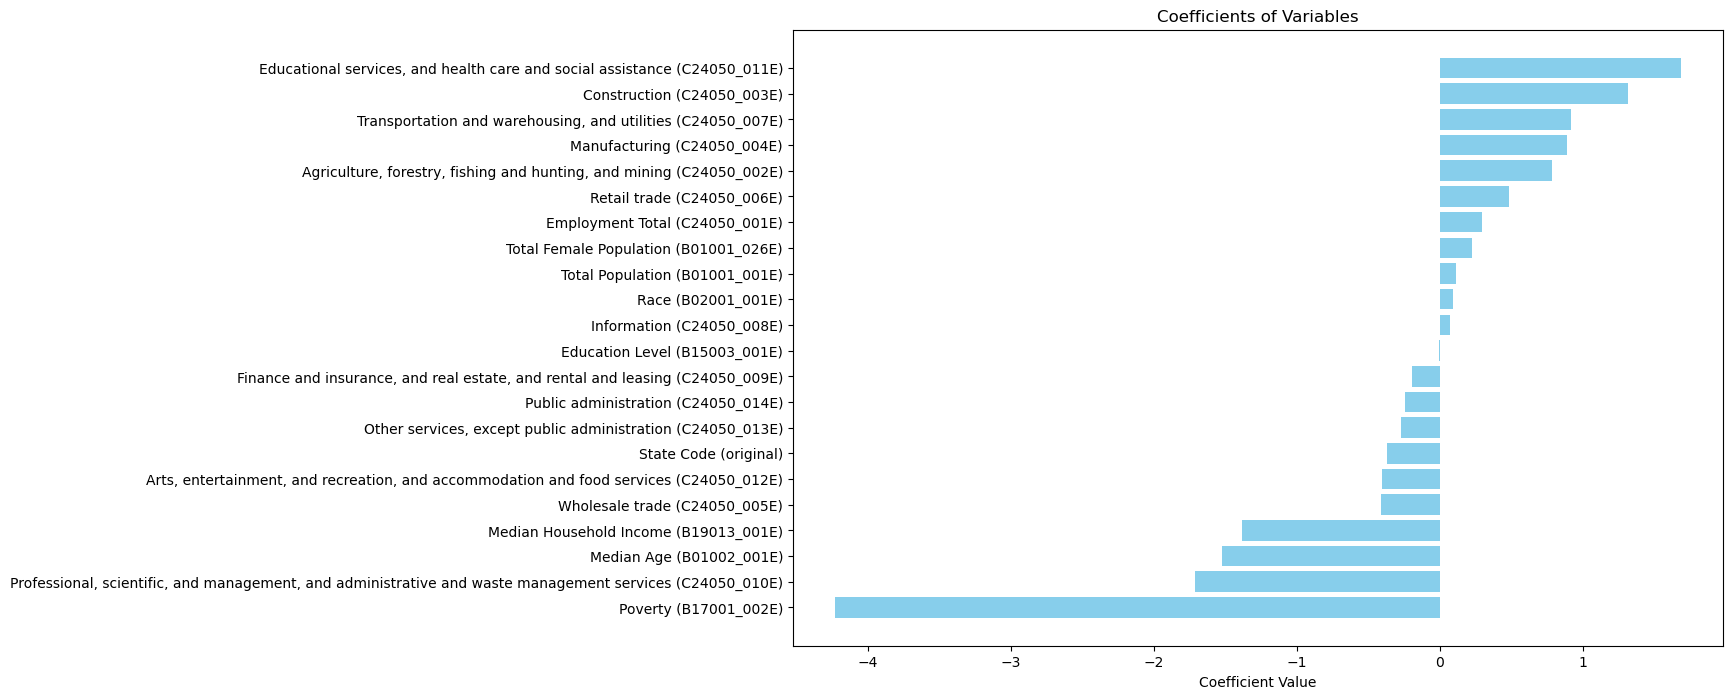

In [1]:
import matplotlib.pyplot as plt

# Variables and their corresponding coefficients
variables = [
    "Educational services, and health care and social assistance (C24050_011E)",
    "Construction (C24050_003E)",
    "Transportation and warehousing, and utilities (C24050_007E)",
    "Manufacturing (C24050_004E)",
    "Agriculture, forestry, fishing and hunting, and mining (C24050_002E)",
    "Retail trade (C24050_006E)",
    "Employment Total (C24050_001E)",
    "Total Female Population (B01001_026E)",
    "Total Population (B01001_001E)",
    "Race (B02001_001E)",
    "Information (C24050_008E)",
    "Education Level (B15003_001E)",
    "Finance and insurance, and real estate, and rental and leasing (C24050_009E)",
    "Public administration (C24050_014E)",
    "Other services, except public administration (C24050_013E)",
    "State Code (original)",
    "Arts, entertainment, and recreation, and accommodation and food services (C24050_012E)",
    "Wholesale trade (C24050_005E)",
    "Median Household Income (B19013_001E)",
    "Median Age (B01002_001E)",
    "Professional, scientific, and management, and administrative and waste management services (C24050_010E)",
    "Poverty (B17001_002E)"
]

coefficients = [
    1.6853934148651777,
    1.3151409801076024,
    0.917849473962012,
    0.8923771533372823,
    0.7891497387195395,
    0.4839178480783433,
    0.2982454327708677,
    0.22501368426990662,
    0.11471698698195543,
    0.09328137971196589,
    0.07196402623764221,
    -0.006892491793141312,
    -0.19213996294869418,
    -0.24498802556708596,
    -0.27127905450843576,
    -0.36699385218460234,
    -0.4019544099647126,
    -0.41242200779032173,
    -1.379941443704826,
    -1.5228841552108152,
    -1.71023740971323,
    -4.226581038344996
]

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.barh(variables, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Coefficients of Variables')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest coefficient on top
plt.show()

In [1]:
import requests
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
US_CENSUS_API_KEY = 'Your API Key'
host = 'https://api.census.gov/data'
year = '/2008'
dataset_acronym = '/acs/acs1'
g = '?get='
variables = 'NAME,B01001_001E'
# location = '&for=us:*'
# Add the API key to the URL
usr_key = f"&key={US_CENSUS_API_KEY}"
location_states = '&for=state:*'  # Fetch data for all states
# Define the variables for the query
# variables_voting_demographics = 'NAME,B01001_001E,B01001_026E,B01002_001E,B15003_001E,C24050_001E,B19013_001E,B02001_001E,B17001_002E,C24050_002E,C24050_003E,C24050_004E,C24050_005E,C24050_006E,C24050_007E,C24050_008E,C24050_009E,C24050_010E,C24050_011E,C24050_012E,C24050_013E,C24050_014E'
variables_voting_demographics = 'NAME,B01001_001E,B01001_026E'
# Construct the query URL
query_url_voting_demographics = f"{host}{year}{dataset_acronym}{g}{variables_voting_demographics}{location_states}{usr_key}"

# Use requests package to call out to the API
response_voting_demographics = requests.get(query_url_voting_demographics)

# Convert the response to JSON
data_voting_demographics = response_voting_demographics.json()

# Create a dataframe from the JSON data
columns_voting_demographics = data_voting_demographics[0]
data_voting_demographics = data_voting_demographics[1:]
df_voting_demographics = pd.DataFrame(data_voting_demographics, columns=columns_voting_demographics)

# Print the head of the dataframe
display(df_voting_demographics.head())

,NAME,B01001_001E,B01001_026E,state
0,Alabama,4661900,2402976,01
1,Alaska,686293,328734,02
2,Arizona,6500180,3241486,04
3,Arkansas,2855390,1456830,05
4,California,36756666,18373143,06


In [ ]:
census_api_params = {
    'US_CENSUS_API_KEY': 'Your API Key',
    'host': 'https://api.census.gov/data',
    'year': '/2008',
    'dataset_acronym': '/acs/acs1',
    'g': '?get=',
    'usr_key': f"&key={'4173b62ab57a1515565edee0cd1b8dcc5d0b760e'}",
    'location_states': '&for=state:*'
}

In [4]:
def fetch_voting_demographics_data(query_variables, census_api_params=census_api_params):
    US_CENSUS_API_KEY = census_api_params['US_CENSUS_API_KEY']
    host = census_api_params['host']
    year = census_api_params['year']
    dataset_acronym = census_api_params['dataset_acronym']
    g = census_api_params['g']
    location_states = census_api_params['location_states']
    usr_key = census_api_params['usr_key']
    
    # Define the variables for the query
    variables_voting_demographics = query_variables

    # Construct the query URL
    query_url_voting_demographics = f"{host}{year}{dataset_acronym}{g}{variables_voting_demographics}{location_states}{usr_key}"

    # Use requests package to call out to the API
    response_voting_demographics = requests.get(query_url_voting_demographics)

    # Convert the response to JSON
    data_voting_demographics = response_voting_demographics.json()

    # Create a dataframe from the JSON data
    columns_voting_demographics = data_voting_demographics[0]
    data_voting_demographics = data_voting_demographics[1:]
    df_voting_demographics = pd.DataFrame(data_voting_demographics, columns=columns_voting_demographics)

    # Rename the columns in the dataframe for voting demographics
    df_voting_demographics = df_voting_demographics.rename(columns={
        'NAME': 'State (NAME)',
        'B01001_001E': 'Total Population (B01001_001E)',
        'B01001_026E': 'Total Female Population (B01001_026E)',
        'B01002_001E': 'Median Age (B01002_001E)',
        'B15003_001E': 'Education Level (B15003_001E)',
        'C24050_001E': 'Employment Total (C24050_001E)',
        'B19013_001E': 'Median Household Income (B19013_001E)',
        'B02001_001E': 'Race (B02001_001E)',
        'B17001_002E': 'Poverty (B17001_002E)',
        'C24050_002E': 'Agriculture, forestry, fishing and hunting, and mining (C24050_002E)',
        'C24050_003E': 'Construction (C24050_003E)',
        'C24050_004E': 'Manufacturing (C24050_004E)',
        'C24050_005E': 'Wholesale trade (C24050_005E)',
        'C24050_006E': 'Retail trade (C24050_006E)',
        'C24050_007E': 'Transportation and warehousing, and utilities (C24050_007E)',
        'C24050_008E': 'Information (C24050_008E)',
        'C24050_009E': 'Finance and insurance, and real estate, and rental and leasing (C24050_009E)',
        'C24050_010E': 'Professional, scientific, and management, and administrative and waste management services (C24050_010E)',
        'C24050_011E': 'Educational services, and health care and social assistance (C24050_011E)',
        'C24050_012E': 'Arts, entertainment, and recreation, and accommodation and food services (C24050_012E)',
        'C24050_013E': 'Other services, except public administration (C24050_013E)',
        'C24050_014E': 'Public administration (C24050_014E)',
        'state': 'State Code (original)'
    })
    
    # BEGIN: drop the last column
    df_voting_demographics = df_voting_demographics.iloc[:, :-1]
    # END: drop the last column
    

    return df_voting_demographics

# Example usage:
# Define the variables for the query
query_variables = 'NAME,B01001_001E,B01001_026E,B01002_001E,B15003_001E,C24050_001E,B19013_001E,B02001_001E,B17001_002E,C24050_002E,C24050_003E,C24050_004E,C24050_005E,C24050_006E,C24050_007E,C24050_008E,C24050_009E,C24050_010E,C24050_011E,C24050_012E,C24050_013E,C24050_014E'
df_district = fetch_voting_demographics_data(query_variables)

## Queries by year

2008, 2012, 2016, 2020

### 2016

In [5]:
census_api_params = {
    'US_CENSUS_API_KEY': '4173b62ab57a1515565edee0cd1b8dcc5d0b760e',
    'host': 'https://api.census.gov/data',
    'year': '/2016',
    'dataset_acronym': '/acs/acs1',
    'g': '?get=',
    'usr_key': f"&key={'4173b62ab57a1515565edee0cd1b8dcc5d0b760e'}",
    'location_states': '&for=state:*'
}
df_2016 = fetch_voting_demographics_data(query_variables, census_api_params=census_api_params)

### 2020

In [6]:
census_api_params = {
    'US_CENSUS_API_KEY': '4173b62ab57a1515565edee0cd1b8dcc5d0b760e',
    'host': 'https://api.census.gov/data',
    'year': '/2019',
    'dataset_acronym': '/acs/acs1',
    'g': '?get=',
    'usr_key': f"&key={'4173b62ab57a1515565edee0cd1b8dcc5d0b760e'}",
    'location_states': '&for=state:*'
}
df_2019 = fetch_voting_demographics_data(query_variables, census_api_params=census_api_params)

In [156]:
print(f"Number of columns in df_2019: {df_2019.shape[1]}")

Number of columns in df_2019: 23


## Election result data

In [8]:
# Load the election data from the CSV file and store it as a pandas dataframe
election_data = pd.read_csv('dataverse_files/1976-2020-president.csv')

# Display the first few rows of the dataframe to verify the data
election_data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER


In [9]:
# Group by year and state, then find the candidate with the highest votes for each state in each year
idx = election_data.groupby(['year', 'state'])['candidatevotes'].idxmax()

# Create a new dataframe with the year, state, and the party_detailed of the candidate with the highest votes
state_party_detailed_by_year = election_data.loc[idx, ['year', 'state', 'party_detailed']].reset_index(drop=True)

# Display the new dataframe
state_party_detailed_by_year

,year,state,party_detailed
0,1976,ALABAMA,DEMOCRAT
1,1976,ALASKA,REPUBLICAN
2,1976,ARIZONA,REPUBLICAN
3,1976,ARKANSAS,DEMOCRAT
4,1976,CALIFORNIA,REPUBLICAN
...,...,...,...
607,2020,VIRGINIA,DEMOCRAT
608,2020,WASHINGTON,DEMOCRAT
609,2020,WEST VIRGINIA,REPUBLICAN
610,2020,WISCONSIN,DEMOCRAT


In [10]:
grouped_by_state = state_party_detailed_by_year.groupby('state')

# Filter the grouped data to keep only the states where the party_detailed is the same for the years 2012, 2016, and 2020
filtered_grouped_by_state = grouped_by_state.filter(lambda x:(x['year'] == 2016).any() and (x['year'] == 2020).any() and (x['party_detailed'].nunique() == 1))

# Group by state and display the filtered data
grouped_by_state = filtered_grouped_by_state.groupby('state')
grouped_by_state_table = grouped_by_state.apply(lambda x: pd.Series({
    'Years': ', '.join(x['year'].astype(str).unique()),
    'Party': x['party_detailed'].iloc[0]
})).reset_index()

# Save the grouped_by_state_table as an Excel file
grouped_by_state_table.to_excel("grouped_by_state_table.xlsx", index=False)

grouped_by_state_table

,state,Years,Party
0,ALASKA,"1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004...",REPUBLICAN
1,DISTRICT OF COLUMBIA,"1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004...",DEMOCRAT
2,IDAHO,"1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004...",REPUBLICAN
3,KANSAS,"1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004...",REPUBLICAN
4,NEBRASKA,"1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004...",REPUBLICAN
5,NORTH DAKOTA,"1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004...",REPUBLICAN
6,OKLAHOMA,"1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004...",REPUBLICAN
7,SOUTH DAKOTA,"1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004...",REPUBLICAN
8,UTAH,"1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004...",REPUBLICAN
9,WYOMING,"1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004...",REPUBLICAN


In [11]:
# Filter the election data to keep only the years 2016 to 2020
election_data_filtered = state_party_detailed_by_year[state_party_detailed_by_year['year'].isin([2016, 2020])]

# Display the filtered dataframe
election_data_filtered['year'].value_counts()

year
2016    51
2020    51
Name: count, dtype: int64

In [12]:
party_detailed_2016 = state_party_detailed_by_year[state_party_detailed_by_year['year'] == 2016]['party_detailed']
party_detailed_2016.values.shape

(51,)

## Run Clustering on the census data 

In [15]:
election_data_filtered['party_detailed'].value_counts()

party_detailed
REPUBLICAN    55
DEMOCRAT      47
Name: count, dtype: int64

In [16]:
numpy_df_2016 = df_2016.to_numpy()
numpy_df_2020 = df_2019.to_numpy()

### Clustering Function Definition

In [17]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import numpy as np

def predict_party_based_on_neighbors(numpy_df, election_data_filtered, year, k=5, n_clusters=5):
    # Convert the relevant columns to numeric values for clustering
    numeric_data = numpy_df[:, 1:].astype(float)

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(numeric_data)
    labels = kmeans.labels_

    # Find the k-nearest neighbors for each state
    neighbors = NearestNeighbors(n_neighbors=k).fit(numeric_data)
    distances, indices = neighbors.kneighbors(numeric_data)

    # Create a dictionary to map each state to its nearest neighbors
    state_neighbors = {}
    for i, state in enumerate(numpy_df[:, 0]):
        state_neighbors[state] = numpy_df[indices[i], 0]

    ### Predict the party of each state based on the party of its neighbors
    # Initialize a dictionary to store the results
    state_party = {}

    # Loop through each state and its neighbors
    for state, neighbors in state_neighbors.items():
        # Initialize a list to store the party details for the neighbors
        neighbor_parties = []

        # Loop through each neighbor
        for neighbor in neighbors:
            # Find the corresponding value in the election_data_filtered dataframe for the year X
            party = election_data_filtered[(election_data_filtered['year'] == year) & (election_data_filtered['state'] == neighbor.upper())]['party_detailed'].values

            # If a party is found, add it to the list
            if len(party) > 0:
                neighbor_parties.append(party[0])

        # Store the list of neighbor parties in the dictionary
        if neighbor_parties:
            most_popular_party = max(set(neighbor_parties), key=neighbor_parties.count)
            count_most_popular_party = neighbor_parties.count(most_popular_party)
            state_party[state.upper()] = most_popular_party.upper(), count_most_popular_party
        else:
            state_party[state.upper()] = (None, 0)

    #### Calculate the accuracy of the model for the year X
    # Initialize counters for correct and total matches
    correct_matches = 0
    total_matches = 0

    # Loop through each row in election_data_filtered for the year X
    for index, row in election_data_filtered[election_data_filtered['year'] == year].iterrows():
        state = row['state']
        party_detailed = row['party_detailed']

        # Check if the state exists in state_party and if the party matches
        if state in state_party.keys() and state_party[state][0] == party_detailed:
            correct_matches += 1
        total_matches += 1

    # Calculate the accuracy
    accuracy = correct_matches / total_matches if total_matches > 0 else 0

    # Print the accuracy
    # print(f"Accuracy: {accuracy * 100:.2f}%")

    return state_party, accuracy

# Example usage:
# state_party_2016, accuracy = predict_party_based_on_neighbors(numpy_df_2020, election_data_filtered, 2020)
from sklearn.preprocessing import MinMaxScaler
numpy_df_2020_norm = numpy_df_2020.copy()
numpy_df_2020_norm[:, 1:] = MinMaxScaler().fit_transform(numpy_df_2020_norm[:, 1:])
state_party_2020, accuracy = predict_party_based_on_neighbors(numpy_df_2020, election_data_filtered, 2020)
state_party_2020, norm_accuracy = predict_party_based_on_neighbors(numpy_df_2020_norm, election_data_filtered, 2020)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Normalized data Accuracy: {accuracy * 100:.2f}%")

Accuracy: 74.51%
Normalized data Accuracy: 74.51%


### Find best 2 variables 2020 as per accuracy they produce for KNN clustering

In [178]:
# Initialize a dictionary to store the accuracies for each combination
accuracies_2020 = {}

# Get the number of columns in the numpy array (excluding the state name column)
num_columns = numpy_df_2020.shape[1] - 1

# Loop through all possible combinations of var1 and var2
for var1 in range(1, num_columns):
    for var2 in range(var1 + 1, num_columns + 1):
        # Select only the two variables from numpy_df_2020 for the prediction
        numpy_df_2020_two_vars = numpy_df_2020[:, [0, var1, var2]]
        # normalize the data
        numpy_df_2020_norm = numpy_df_2020_two_vars.copy()
        numpy_df_2020_norm[:, 1:] = MinMaxScaler().fit_transform(numpy_df_2020_norm[:, 1:])
        # Run the function with the modified numpy array
        state_party_2020, accuracy_2020 = predict_party_based_on_neighbors(numpy_df_2020_norm, election_data_filtered, 2020)
        
        # Store the accuracy in the dictionary with the combination as the key
        accuracies_2020[(var1, var2)] = accuracy_2020

In [179]:
# Sort the accuracies dictionary for 2020 in descending order by accuracy
sorted_accuracies_2020 = dict(sorted(accuracies_2020.items(), key=lambda item: item[1], reverse=True))

# Replace var1 and var2 with column names
sorted_accuracies_2020_named = {
    (df_2019.columns[var1], df_2019.columns[var2]): accuracy
    for (var1, var2), accuracy in sorted_accuracies_2020.items()
}

# Print the sorted accuracies dictionary in a nice format
for (var1, var2), accuracy in sorted_accuracies_2020_named.items():
    print(f"Variables: {var1} and {var2} - Accuracy: {accuracy * 100:.2f}%")

Variables: Median Age (B01002_001E) and Median Household Income (B19013_001E) - Accuracy: 88.24%
Variables: Poverty (B17001_002E) and Professional, scientific, and management, and administrative and waste management services (C24050_010E) - Accuracy: 84.31%
Variables: Median Household Income (B19013_001E) and Information (C24050_008E) - Accuracy: 82.35%
Variables: Agriculture, forestry, fishing and hunting, and mining (C24050_002E) and Construction (C24050_003E) - Accuracy: 82.35%
Variables: Agriculture, forestry, fishing and hunting, and mining (C24050_002E) and Finance and insurance, and real estate, and rental and leasing (C24050_009E) - Accuracy: 82.35%
Variables: Total Population (B01001_001E) and Median Household Income (B19013_001E) - Accuracy: 80.39%
Variables: Total Female Population (B01001_026E) and Median Household Income (B19013_001E) - Accuracy: 80.39%
Variables: Education Level (B15003_001E) and Median Household Income (B19013_001E) - Accuracy: 80.39%
Variables: Median H

In [181]:
# Extract the two variables with the best accuracy for 2020
best_vars = list(sorted_accuracies_2020_named.keys())[0]
var1, var2 = best_vars

# Select only the two variables from numpy_df_2020 for the prediction
numpy_df_2020_best_two_vars = numpy_df_2020[:, [0, df_2019.columns.get_loc(var1), df_2019.columns.get_loc(var2)]]

# Normalize the data
numpy_df_2020_best_two_vars_norm = numpy_df_2020_best_two_vars.copy()
numpy_df_2020_best_two_vars_norm[:, 1:] = MinMaxScaler().fit_transform(numpy_df_2020_best_two_vars_norm[:, 1:].astype(float))

# Find the 10 nearest neighbors for each state
neighbors = NearestNeighbors(n_neighbors=10).fit(numpy_df_2020_best_two_vars_norm[:, 1:])
distances, indices = neighbors.kneighbors(numpy_df_2020_best_two_vars_norm[:, 1:])

# Create a dictionary to map each state to its nearest neighbors
state_neighbors = {}
for i, state in enumerate(numpy_df_2020_best_two_vars_norm[:, 0]):
    state_neighbors[state] = numpy_df_2020_best_two_vars_norm[indices[i], 0]

# Display the nearest neighbors for each state
for state, neighbors in state_neighbors.items():
    print(f"State: {state}, Nearest Neighbors: {', '.join(neighbors)}")

State: Mississippi, Nearest Neighbors: Mississippi, Arkansas, Louisiana, New Mexico, Kentucky, Alabama, Tennessee, Oklahoma, Indiana, Missouri
State: Missouri, Nearest Neighbors: Missouri, North Carolina, Tennessee, Ohio, Indiana, Iowa, Michigan, South Carolina, Kentucky, Arizona
State: Montana, Nearest Neighbors: Montana, South Carolina, Michigan, Ohio, Pennsylvania, North Carolina, Wisconsin, Tennessee, Alabama, Missouri
State: Nebraska, Nearest Neighbors: Nebraska, Idaho, Kansas, Georgia, South Dakota, North Dakota, Wyoming, Arizona, Nevada, Indiana
State: Nevada, Nearest Neighbors: Nevada, Arizona, Iowa, Wyoming, South Dakota, Illinois, Indiana, Kansas, Georgia, Missouri
State: New Hampshire, Nearest Neighbors: New Hampshire, Connecticut, Delaware, Vermont, Rhode Island, New Jersey, Hawaii, Pennsylvania, Massachusetts, Florida
State: New Jersey, Nearest Neighbors: New Jersey, Massachusetts, Hawaii, Maryland, Connecticut, Virginia, Washington, Minnesota, New York, Rhode Island
State

### Find best 2 variables 2016 as per accuracy they produce for KNN clustering

In [182]:
# Initialize a dictionary to store the accuracies for each combination
accuracies_2016 = {}

# Get the number of columns in the numpy array (excluding the state name column)
num_columns = numpy_df_2016.shape[1] - 1

# Loop through all possible combinations of var1 and var2
for var1 in range(1, num_columns):
    for var2 in range(var1 + 1, num_columns + 1):
        # Select only the two variables from numpy_df_2016 for the prediction
        numpy_df_2016_two_vars = numpy_df_2016[:, [0, var1, var2]]
        
        # Run the function with the modified numpy array
        state_party_2016, accuracy_2016 = predict_party_based_on_neighbors(numpy_df_2016_two_vars, election_data_filtered, 2016)
        
        # Store the accuracy in the dictionary with the combination as the key
        accuracies_2016[(var1, var2)] = accuracy_2016

------

In [183]:
# Sort the accuracies dictionary for 2016 in descending order by accuracy
sorted_accuracies_2016 = dict(sorted(accuracies_2016.items(), key=lambda item: item[1], reverse=True))

# Replace var1 and var2 with column names
sorted_accuracies_2016_named = {
    (df_2016.columns[var1], df_2016.columns[var2]): accuracy
    for (var1, var2), accuracy in sorted_accuracies_2016.items()
}

# Print the sorted accuracies dictionary in a nice format
for (var1, var2), accuracy in sorted_accuracies_2016_named.items():
    print(f"Variables: {var1} and {var2} - Accuracy: {accuracy * 100:.2f}%")

Variables: Median Household Income (B19013_001E) and Agriculture, forestry, fishing and hunting, and mining (C24050_002E) - Accuracy: 86.27%
Variables: Median Age (B01002_001E) and Agriculture, forestry, fishing and hunting, and mining (C24050_002E) - Accuracy: 84.31%
Variables: Poverty (B17001_002E) and Arts, entertainment, and recreation, and accommodation and food services (C24050_012E) - Accuracy: 84.31%
Variables: Median Age (B01002_001E) and Median Household Income (B19013_001E) - Accuracy: 82.35%
Variables: Poverty (B17001_002E) and Professional, scientific, and management, and administrative and waste management services (C24050_010E) - Accuracy: 80.39%
Variables: Agriculture, forestry, fishing and hunting, and mining (C24050_002E) and Information (C24050_008E) - Accuracy: 80.39%
Variables: Agriculture, forestry, fishing and hunting, and mining (C24050_002E) and Other services, except public administration (C24050_013E) - Accuracy: 80.39%
Variables: Median Household Income (B19

In [184]:
import pandas as pd

# Convert the sorted accuracies dictionaries to dataframes
df_sorted_accuracies_2016 = pd.DataFrame(list(sorted_accuracies_2016.items()), columns=['Variables', 'Accuracy'])
df_sorted_accuracies_2020 = pd.DataFrame(list(sorted_accuracies_2020.items()), columns=['Variables', 'Accuracy'])

df_sorted_accuracies_2020_named = pd.DataFrame(list(sorted_accuracies_2020_named.items()), columns=['Variables', 'Accuracy'])
df_sorted_accuracies_2016_named = pd.DataFrame(list(sorted_accuracies_2016_named.items()), columns=['Variables', 'Accuracy'])

# Create a Pandas Excel writer using XlsxWriter as the engine

# Write each dataframe to a different worksheet
df_sorted_accuracies_2016.to_excel("accuracy_2016.xlsx", sheet_name='2016', index=False)
df_sorted_accuracies_2020.to_excel("accuracies_2020.xlsx", sheet_name='2020', index=False)

df_sorted_accuracies_2016_named.to_excel("named_accuracy_2016.xlsx", sheet_name='2016', index=False)
df_sorted_accuracies_2020_named.to_excel("named_accuracy_2020.xlsx", sheet_name='2016', index=False)

## Clusters on District data

In [18]:
census_api_params = {
    'US_CENSUS_API_KEY': '4173b62ab57a1515565edee0cd1b8dcc5d0b760e',
    'host': 'https://api.census.gov/data',
    'year': '/2008',
    'dataset_acronym': '/acs/acs1',
    'g': '?get=',
    'usr_key': f"&key={'4173b62ab57a1515565edee0cd1b8dcc5d0b760e'}",
    'location_states': '&for=congressional%20district:*'
}

In [19]:
from sklearn.metrics.pairwise import euclidean_distances

In [20]:
def fetch_voting_demographics_data(query_variables, census_api_params=census_api_params):
    US_CENSUS_API_KEY = census_api_params['US_CENSUS_API_KEY']
    host = census_api_params['host']
    year = census_api_params['year']
    dataset_acronym = census_api_params['dataset_acronym']
    g = census_api_params['g']
    location_states = census_api_params['location_states']
    usr_key = census_api_params['usr_key']
    
    # Define the variables for the query
    variables_voting_demographics = query_variables

    # Construct the query URL
    query_url_voting_demographics = f"{host}{year}{dataset_acronym}{g}{variables_voting_demographics}{location_states}{usr_key}"

    # Use requests package to call out to the API
    response_voting_demographics = requests.get(query_url_voting_demographics)

    # Convert the response to JSON
    data_voting_demographics = response_voting_demographics.json()

    # Create a dataframe from the JSON data
    columns_voting_demographics = data_voting_demographics[0]
    data_voting_demographics = data_voting_demographics[1:]
    df_voting_demographics = pd.DataFrame(data_voting_demographics, columns=columns_voting_demographics)

    # Rename the columns in the dataframe for voting demographics
    df_voting_demographics = df_voting_demographics.rename(columns={
        'NAME': 'district (NAME)',
        'B01001_001E': 'Total Population (B01001_001E)',
        'B01001_026E': 'Total Female Population (B01001_026E)',
        'B01002_001E': 'Median Age (B01002_001E)',
        'B15003_001E': 'Education Level (B15003_001E)',
        'C24050_001E': 'Employment Total (C24050_001E)',
        'B19013_001E': 'Median Household Income (B19013_001E)',
        'B02001_001E': 'Race (B02001_001E)',
        'B17001_002E': 'Poverty (B17001_002E)',
        'C24050_002E': 'Agriculture, forestry, fishing and hunting, and mining (C24050_002E)',
        'C24050_003E': 'Construction (C24050_003E)',
        'C24050_004E': 'Manufacturing (C24050_004E)',
        'C24050_005E': 'Wholesale trade (C24050_005E)',
        'C24050_006E': 'Retail trade (C24050_006E)',
        'C24050_007E': 'Transportation and warehousing, and utilities (C24050_007E)',
        'C24050_008E': 'Information (C24050_008E)',
        'C24050_009E': 'Finance and insurance, and real estate, and rental and leasing (C24050_009E)',
        'C24050_010E': 'Professional, scientific, and management, and administrative and waste management services (C24050_010E)',
        'C24050_011E': 'Educational services, and health care and social assistance (C24050_011E)',
        'C24050_012E': 'Arts, entertainment, and recreation, and accommodation and food services (C24050_012E)',
        'C24050_013E': 'Other services, except public administration (C24050_013E)',
        'C24050_014E': 'Public administration (C24050_014E)',
        'state': 'State Code (original)'
    })
    
    # BEGIN: drop the last column
    df_voting_demographics = df_voting_demographics.iloc[:, :-1]
    # END: drop the last column
    

    return df_voting_demographics


In [23]:
# variables with the highest accuracy
# ('Median Household Income (B19013_001E)', 'Agriculture, forestry, fishing and hunting, and mining (C24050_002E)')
# ('Poverty (B17001_002E)', 'Professional, scientific, and management, and administrative and waste management services (C24050_010E)')
# ('Construction (C24050_003E)', 'Educational services, and health care and social assistance (C24050_011E)')
vars = 'Poverty (B17001_002E)', 'Agriculture, forestry, fishing and hunting, and mining (C24050_002E)', 'Professional, scientific, and management, and administrative and waste management services (C24050_010E)', 'Construction (C24050_003E)', 'Educational services, and health care and social assistance (C24050_011E)', 'Median Household Income (B19013_001E)'   

In [30]:
# Define the variables for the query
query_variables = 'NAME,B01001_001E,B01001_026E,B01002_001E,B15003_001E,C24050_001E,B19013_001E,B02001_001E,B17001_002E,C24050_002E,C24050_003E,C24050_004E,C24050_005E,C24050_006E,C24050_007E,C24050_008E,C24050_009E,C24050_010E,C24050_011E,C24050_012E,C24050_013E,C24050_014E'
df_district = fetch_voting_demographics_data(query_variables, census_api_params=census_api_params)

selected_columns_df = df_district[[df_district.columns[0], *vars]]
# Find the nearest neighbor for Congressional District 15 (116th Congress), New York
district_name = 'Congressional District 15 (110th Congress), New York'

# Normalize the data
selected_columns_df.iloc[:, 1:] = MinMaxScaler().fit_transform(selected_columns_df.iloc[:, 1:].astype(float))
centriod = selected_columns_df[selected_columns_df['district (NAME)'].map(str.lower) == district_name.lower()]
centriod = centriod.iloc[0][1:]

# Find the distance between the centroid and all other districts
distances = euclidean_distances(selected_columns_df.iloc[:, 1:], [centriod])

# find the 10 nearest districts
nearest_districts = distances.argsort(axis=0)[:25]

# Display the 10 nearest districts
selected_columns_df.iloc[nearest_districts.flatten()]

# add the distance to the nearest districts
selected_columns_df['distance'] = distances.flatten()

# Save the nearest districts to an Excel file
nearest_districts_df = selected_columns_df.iloc[nearest_districts.flatten()]
nearest_districts_df.to_excel("NY15D2020.xlsx", index=False)
nearest_districts_df

,district (NAME),Poverty (B17001_002E),"Agriculture, forestry, fishing and hunting, and mining (C24050_002E)","Professional, scientific, and management, and administrative and waste management services (C24050_010E)",Construction (C24050_003E),"Educational services, and health care and social assistance (C24050_011E)",Median Household Income (B19013_001E),distance
349,"Congressional District 15 (110th Congress), Ne...",0.078219,0.003662,0.310726,0.02318,0.189878,0.221335,0.000000
407,"Congressional District 2 (110th Congress), Pen...",0.068914,0.004739,0.231055,0.035418,0.179329,0.196175,0.085612
362,"Congressional District 28 (110th Congress), Ne...",0.05844,0.013947,0.220699,0.057226,0.169765,0.219604,0.100839
146,"Congressional District 4 (110th Congress), Wis...",0.068887,0.020678,0.216618,0.068667,0.151048,0.237774,0.114368
344,"Congressional District 10 (110th Congress), Ne...",0.089222,0.0,0.208185,0.101119,0.219135,0.264159,0.139332
345,"Congressional District 11 (110th Congress), Ne...",0.061211,0.0,0.363852,0.098737,0.25248,0.309275,0.143131
301,"Congressional District 1 (110th Congress), Mis...",0.048456,0.009424,0.209681,0.082394,0.129291,0.272384,0.144611
419,"Congressional District 14 (110th Congress), Pe...",0.044915,0.002531,0.177648,0.070485,0.201332,0.22075,0.145567
52,"Congressional District 33 (110th Congress), Ca...",0.059278,0.011865,0.355116,0.134282,0.12388,0.27289,0.147492
388,"Congressional District 11 (110th Congress), Ohio",0.050655,0.00438,0.173465,0.018448,0.142078,0.198714,0.149732


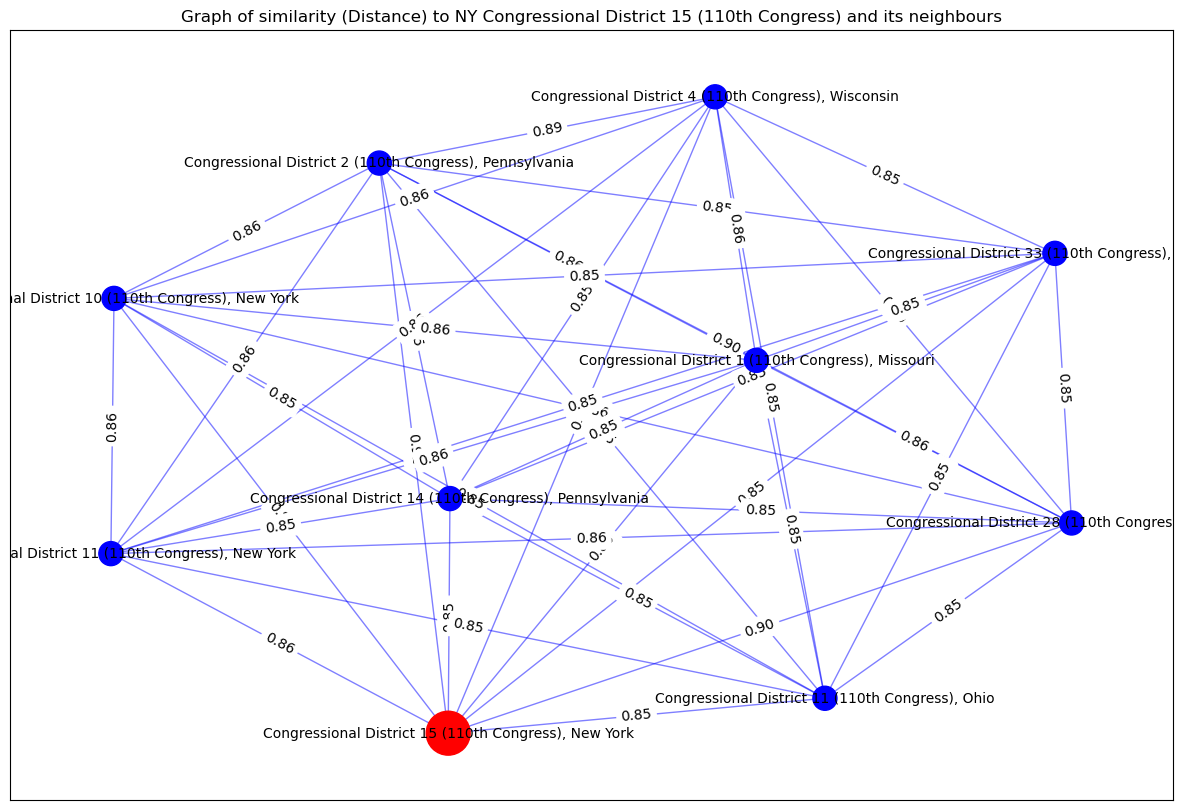

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes
for district in nearest_districts_df['district (NAME)']:
    G.add_node(district)

# Add edges based on similarity (distance)
for i, district in enumerate(nearest_districts_df['district (NAME)']):
    for j in range(i + 1, len(nearest_districts_df)):
        neighbor_district = nearest_districts_df.iloc[j]['district (NAME)']
        distance = nearest_districts_df.iloc[j]['distance']
        if district != neighbor_district and distance < 0.15:  # Add edge only if the distance is below the threshold and districts are different
            G.add_edge(district, neighbor_district, weight=1-distance)

# Remove disconnected nodes
disconnected_nodes = list(nx.isolates(G))
G.remove_nodes_from(disconnected_nodes)

# Draw the graph
plt.figure(figsize=(15, 10))  # Set the figure size
pos = nx.spring_layout(G)  # positions for all nodes
edges = G.edges(data=True)

# Draw nodes
node_colors = ['red' if node == 'Congressional District 15 (110th Congress), New York' else 'blue' for node in G.nodes()]
node_sizes = [1000 if node == 'Congressional District 15 (110th Congress), New York' else 300 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors)

# Draw edges with weights
nx.draw_networkx_edges(G, pos, edgelist=edges, width=1, edge_color='b', alpha=0.5)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in edges})

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

# Show plot
plt.title("Graph of similarity (Distance) to NY Congressional District 15 (110th Congress) and its neighbours")
plt.show()


In [275]:
# Load the named_accuracy_2016.xlsx file
df_named_accuracy_2016 = pd.read_excel("named_accuracy_2016.xlsx")

# Sort the dataframe by accuracy in descending order
df_named_accuracy_2016 = df_named_accuracy_2016.sort_values(by='Accuracy', ascending=False)


selected_columns_df_2016 = df_district[[df_district.columns[0], var1, var2]]
# Find the nearest neighbor for Congressional District 15 (110th Congress), New York
district_name_2016 = 'Congressional District 15 (110th Congress), New York'

# Normalize the data
selected_columns_df_2016.iloc[:, 1:] = MinMaxScaler().fit_transform(selected_columns_df_2016.iloc[:, 1:].astype(float))
centroid_2016 = selected_columns_df_2016[selected_columns_df_2016['district (NAME)'].map(str.lower) == district_name_2016.lower()]
centroid_2016 = centroid_2016.iloc[0][1:]

# Find the distance between the centroid and all other districts
distances_2016 = euclidean_distances(selected_columns_df_2016.iloc[:, 1:], [centroid_2016])

# Find the 10 nearest districts
nearest_districts_2016 = distances_2016.argsort(axis=0)[:10]

# Display the 10 nearest districts
selected_columns_df_2016.iloc[nearest_districts_2016.flatten()]
# Add the distance to the nearest districts
selected_columns_df_2016['distance'] = distances_2016.flatten()

# Save the nearest districts to an Excel file
nearest_districts_df_2016 = selected_columns_df_2016.iloc[nearest_districts_2016.flatten()]
nearest_districts_df_2016.to_excel("NY15D2016.xlsx", index=False)
nearest_districts_df_2016

,district (NAME),Poverty (B17001_002E),"Agriculture, forestry, fishing and hunting, and mining (C24050_002E)",distance
349,"Congressional District 15 (110th Congress), Ne...",0.078219,0.003662,0.000000
286,"Congressional District 13 (110th Congress), Mi...",0.085084,0.00499,0.006992
53,"Congressional District 34 (110th Congress), Ca...",0.076819,0.011596,0.008056
50,"Congressional District 31 (110th Congress), Ca...",0.084132,0.009675,0.008433
287,"Congressional District 14 (110th Congress), Mi...",0.072364,0.01007,0.008680
346,"Congressional District 12 (110th Congress), Ne...",0.076743,0.012278,0.008741
407,"Congressional District 2 (110th Congress), Pen...",0.068914,0.004739,0.009367
344,"Congressional District 10 (110th Congress), Ne...",0.089222,0.0,0.011596
207,"Congressional District 4 (110th Congress), Ill...",0.067561,0.010572,0.012702
210,"Congressional District 7 (110th Congress), Ill...",0.066682,0.009998,0.013162


## Linear Regression

In [24]:
# Create a mapping for party details to numeric values
party_mapping = {'DEMOCRAT': 1, 'REPUBLICAN': 2}

# Map the party details to numeric values in the filtered election data
election_data_filtered['party_numeric'] = election_data_filtered['party_detailed'].map(party_mapping)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8996\102270535.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_data_filtered['party_numeric'] = election_data_filtered['party_detailed'].map(party_mapping)


In [25]:
# Extract the party_numeric column as a NumPy array
party_numeric_2020 = election_data_filtered[election_data_filtered['year'] == 2020]['party_numeric'].values

# Ensure the states in numpy_df_2020 and election_data_filtered are aligned
# Extract the state names from numpy_df_2020
states_2020 = numpy_df_2020[:, 0]

# Create a dictionary to map state names to party_numeric values
state_to_party_numeric = dict(zip(election_data_filtered[election_data_filtered['year'] == 2020]['state'], party_numeric_2020))

# Create a new column for party_numeric in the same order as states_2020
party_numeric_column = np.array([state_to_party_numeric.get(state.upper(), -1) for state in states_2020])

# Concatenate the party_numeric column to the numpy_df_2020 array
numpy_df_2020_with_party = np.column_stack((numpy_df_2020, party_numeric_column))


In [26]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

# Extract features and target variable
X = numpy_df_2020_with_party[:, 1:-1].astype(float)
y = numpy_df_2020_with_party[:, -1].astype(float)

# Normalize to be between 0 and 1
X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)
# Create and train the Lasso regression model
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display the coefficients
print("Coefficients:", lasso.coef_)

# Calculate the accuracy of the model
y_pred_rounded = np.round(y_pred)
f1 = f1_score(y_test, y_pred_rounded, average='weighted')
print(f"F1 Score: {f1}")


Mean Squared Error: 0.343369406792246
Coefficients: [ 0.          0.         -1.67035714  0.          0.         -2.62111552
  0.         -9.05906902  0.39972336  4.66416708  0.74245583  0.
  0.          0.78200155  0.         -0.         -1.86300301  3.84587306
  0.          0.          0.         -0.42155807]
F1 Score: 0.6666666666666666


In [33]:
# Get the absolute values of the coefficients
coefficients = lasso.coef_

# Get the indices of the sorted coefficients in descending order
sorted_indices = np.argsort(coefficients)[::-1]
# Get the sorted coefficients
sorted_coefficients = coefficients[sorted_indices]

# Get the corresponding variable names (excluding the state name column)
variable_names = df_2019.columns[1:]  # Adjust this if your variable names are different

# Get the sorted variable names
sorted_variable_names = variable_names[sorted_indices]

# Print the sorted variable names and their corresponding coefficients
for name, coef in zip(sorted_variable_names, sorted_coefficients):
    print(f"Variable: {name}, Coefficient: {coef}")

Variable: Construction (C24050_003E), Coefficient: 4.664167081603703
Variable: Educational services, and health care and social assistance (C24050_011E), Coefficient: 3.8458730601686093
Variable: Transportation and warehousing, and utilities (C24050_007E), Coefficient: 0.7820015484072711
Variable: Manufacturing (C24050_004E), Coefficient: 0.7424558279119239
Variable: Agriculture, forestry, fishing and hunting, and mining (C24050_002E), Coefficient: 0.39972336295374516
Variable: Public administration (C24050_014E), Coefficient: 0.0
Variable: Total Female Population (B01001_026E), Coefficient: 0.0
Variable: Education Level (B15003_001E), Coefficient: 0.0
Variable: Employment Total (C24050_001E), Coefficient: 0.0
Variable: Race (B02001_001E), Coefficient: 0.0
Variable: Total Population (B01001_001E), Coefficient: 0.0
Variable: Wholesale trade (C24050_005E), Coefficient: 0.0
Variable: Retail trade (C24050_006E), Coefficient: 0.0
Variable: Information (C24050_008E), Coefficient: 0.0
Variabl

In [28]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, f1_score

# Extract features and target variable
X = numpy_df_2020_with_party[:, 1:-1].astype(float)
y = numpy_df_2020_with_party[:, -1].astype(float)

# Normalize to be between 0 and 1
X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Create and train the ElasticNet regression model
elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.01)
elastic_net.fit(X_train, y_train)

# Predict on the test set
y_pred = elastic_net.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display the coefficients
print("Coefficients:", elastic_net.coef_)

# Calculate the accuracy of the model
y_pred_rounded = np.round(y_pred)
f1 = f1_score(y_test, y_pred_rounded, average='weighted')
print(f"F1 Score: {f1}")

Mean Squared Error: 0.4833165918216494
Coefficients: [ 0.11471699  0.22501368 -1.52288416 -0.00689249  0.29824543 -1.37994144
  0.09328138 -4.22658104  0.78914974  1.31514098  0.89237715 -0.41242201
  0.48391785  0.91784947  0.07196403 -0.19213996 -1.71023741  1.68539341
 -0.40195441 -0.27127905 -0.24498803 -0.36699385]
F1 Score: 0.7222222222222222


c:\Users\Lenovo\miniconda3\envs\dl_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.554e+00, tolerance: 1.715e-03
  model = cd_fast.enet_coordinate_descent(


In [34]:
# Get the absolute values of the coefficients
coefficients = elastic_net.coef_

# Get the indices of the sorted coefficients in descending order
sorted_indices = np.argsort(coefficients)[::-1]

# Get the sorted coefficients
sorted_coefficients = coefficients[sorted_indices]

# Get the corresponding variable names (excluding the state name column)
variable_names = df_2019.columns[1:]  # Adjust this if your variable names are different

# Get the sorted variable names
sorted_variable_names = variable_names[sorted_indices]

# Print the sorted variable names and their corresponding coefficients
for name, coef in zip(sorted_variable_names, sorted_coefficients):
    print(f"Variable: {name}, Coefficient: {coef}")

Variable: Educational services, and health care and social assistance (C24050_011E), Coefficient: 1.6853934148651777
Variable: Construction (C24050_003E), Coefficient: 1.3151409801076024
Variable: Transportation and warehousing, and utilities (C24050_007E), Coefficient: 0.917849473962012
Variable: Manufacturing (C24050_004E), Coefficient: 0.8923771533372823
Variable: Agriculture, forestry, fishing and hunting, and mining (C24050_002E), Coefficient: 0.7891497387195395
Variable: Retail trade (C24050_006E), Coefficient: 0.4839178480783433
Variable: Employment Total (C24050_001E), Coefficient: 0.2982454327708677
Variable: Total Female Population (B01001_026E), Coefficient: 0.22501368426990662
Variable: Total Population (B01001_001E), Coefficient: 0.11471698698195543
Variable: Race (B02001_001E), Coefficient: 0.09328137971196589
Variable: Information (C24050_008E), Coefficient: 0.07196402623764221
Variable: Education Level (B15003_001E), Coefficient: -0.006892491793141312
Variable: Finance 

In [32]:
df_2019.columns[:]

Index(['State (NAME)', 'Total Population (B01001_001E)',
       'Total Female Population (B01001_026E)', 'Median Age (B01002_001E)',
       'Education Level (B15003_001E)', 'Employment Total (C24050_001E)',
       'Median Household Income (B19013_001E)', 'Race (B02001_001E)',
       'Poverty (B17001_002E)',
       'Agriculture, forestry, fishing and hunting, and mining (C24050_002E)',
       'Construction (C24050_003E)', 'Manufacturing (C24050_004E)',
       'Wholesale trade (C24050_005E)', 'Retail trade (C24050_006E)',
       'Transportation and warehousing, and utilities (C24050_007E)',
       'Information (C24050_008E)',
       'Finance and insurance, and real estate, and rental and leasing (C24050_009E)',
       'Professional, scientific, and management, and administrative and waste management services (C24050_010E)',
       'Educational services, and health care and social assistance (C24050_011E)',
       'Arts, entertainment, and recreation, and accommodation and food services (